In [1]:
# Initial imports
import os
import pandas as pd
import hvplot.pandas
import yfinance as yf
from datetime import datetime
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from yahoo_fin import options as op

import holoviews as hv
from prophet import Prophet
import seaborn as sns
from datetime import datetime, timezone, timedelta
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("alpaca.env")

True

In [3]:
# Set names for an alpaca api key and secret and get the keys from environment file
alpaca_key = os.getenv('alpaca_key')
alpaca_secret = os.getenv('alpaca_secret')
base_url = 'https://paper-api.alpaca.markets' 
# Print and verify that keys were loaded correctly 
print(f'Alpaca key type: {type(alpaca_key)}')
print(f'Alpaca key type: {type(alpaca_secret)}')

Alpaca key type: <class 'str'>
Alpaca key type: <class 'str'>


In [4]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_key, 
                       alpaca_secret, 
                       api_version='2')

In [5]:
# Create current date variable
import datetime
today = datetime.date.today()
historical = today - datetime.timedelta(days=365)

In [6]:
# Format current date as ISO format
start_date = pd.Timestamp(historical, tz='America/New_York').isoformat()
end_date = pd.Timestamp(today, tz='America/New_York').isoformat()

#end_date = pd.Timestamp.now(tz='America/New_York').isoformat()
#start_date = (pd.Timestamp.now(tz='America/New_York') - pd.DateOffset(years=1)).isoformat()

In [7]:
# Set the tickers
tickers = ['XLE']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stock_price = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
stock_price

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-04-12 04:00:00+00:00,86.53,87.2500,86.270,130568,87.07,16667178,86.753472,XLE
2023-04-13 04:00:00+00:00,87.07,87.2900,86.190,132995,86.40,15692262,86.870389,XLE
2023-04-14 04:00:00+00:00,87.23,87.7388,86.720,110707,87.19,11775619,87.139064,XLE
2023-04-17 04:00:00+00:00,86.20,87.3000,85.900,105535,86.94,11880993,86.514749,XLE
2023-04-18 04:00:00+00:00,86.54,86.7600,85.570,110085,86.00,12246759,86.260524,XLE
...,...,...,...,...,...,...,...,...
2024-04-05 04:00:00+00:00,98.08,98.4667,96.850,132988,97.44,15597269,97.850093,XLE
2024-04-08 04:00:00+00:00,97.46,98.4100,97.285,125942,98.13,17017279,97.779995,XLE
2024-04-09 04:00:00+00:00,97.49,98.1400,96.780,137980,97.88,17666552,97.313308,XLE


In [31]:
import yfinance as yf
from datetime import datetime, timedelta

currencies = ['CAD=X', 'MXN=X', 'BRL=X', 'SAR=X', 'IQD=X', 'COP=X']
# Define the currency pairs
#currency_pairs = ','.join(['{}=X'.format(currency) for currency in currencies])
# Calculate 365 days back from today
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
# Get exchange rate for the past 365 days for all currency pairs
#exchange_rate_data = yf.download(currency_pairs, start=start_date, end=end_date)['Close']
# Rename columns to respective currency names
#exchange_rate_data.columns = currencies
CAD = yf.download('CAD=X', start=start_date, end=end_date)
CAD.drop(columns= ['high', 'low', 'open', 'volume', 'Adj Close'])
MXN = yf.download('MXN=X', start=start_date, end=end_date)
MXN.drop(columns= ['high', 'low', 'open', 'volume', 'Adj Close'])
BRL = yf.download('BRL=X', start=start_date, end=end_date)
BRL.drop(columns= ['high', 'low', 'open', 'volume', 'Adj Close'])
SAR = yf.download('SAR=X', start=start_date, end=end_date)
SAR.drop(columns= ['high', 'low', 'open', 'volume', 'Adj Close'])
IQD = yf.download('IQD=X', start=start_date, end=end_date)
IQD.drop(columns= ['high', 'low', 'open', 'volume', 'Adj Close'])
COP = yf.download('COP=X', start=start_date, end=end_date)
COP.drop(columns= ['high', 'low', 'open', 'volume', 'Adj Close'])
exchange_rate_data = pd.concat([COP
exchange_rate_data

[*********************100%%**********************]  6 of 6 completed


Price      Adj Close                                                          \
Ticker         BRL=X    CAD=X        COP=X        IQD=X      MXN=X     SAR=X   
Date                                                                           
2023-04-12    5.0040  1.34625  4510.569824  1459.000000  18.158899  3.746994   
2023-04-13    4.9169  1.34400  4449.250000  1458.000000  18.055099  3.746351   
2023-04-14    4.9267  1.33400  4417.979980  1459.000000  18.018999  3.746578   
2023-04-17    4.9087  1.33650  4412.529785  1277.770264  17.992880  3.750300   
2023-04-18    4.9398  1.33920  4426.750000  1459.000000  18.032200  3.746317   
...              ...      ...          ...          ...        ...       ...   
2024-04-05    5.0574  1.35445  3768.250000  1308.000000  16.573200  3.746309   
2024-04-08    5.0549  1.36041  3773.340088  1281.642090  16.452000  3.750500   
2024-04-09    5.0239  1.35708  3771.350098  1278.822998  16.314301  3.746185   
2024-04-10    5.0076  1.35729  3765.250000  1308.000000  16.383310  3.746029   
2024-04-11    5.0662  1.36870  3802.250000  1308.000000  16.452499  3.746358   

Price        Close                                     ...         Open  \
Ticker       BRL=X    CAD=X        COP=X        IQD=X  ...        COP=X   
Date                                                   ...                
2023-04-12  5.0040  1.34625  4510.569824  1459.000000  ...  4510.569824   
2023-04-13  4.9169  1.34400  4449.250000  1458.000000  ...  4449.250000   
2023-04-14  4.9267  1.33400  4417.979980  1459.000000  ...  4417.979980   
2023-04-17  4.9087  1.33650  4412.529785  1277.770264  ...  4412.529785   
2023-04-18  4.9398  1.33920  4426.750000  1459.000000  ...  4426.750000   
...            ...      ...          ...          ...  ...          ...   
2024-04-05  5.0574  1.35445  3768.250000  1308.000000  ...  3768.250000   
2024-04-08  5.0549  1.36041  3773.340088  1281.642090  ...  3773.340088   
2024-04-09  5.0239  1.35708  3771.350098  1278.822998  ...  3771.350098   
2024-04-10  5.0076  1.35729  3765.250000  1308.000000  ...  3765.250000   
2024-04-11  5.0662  1.36870  3802.250000  1308.000000  ...  3802.250000   

Price                                        Volume                          \
Ticker            IQD=X      MXN=X     SAR=X  BRL=X CAD=X COP=X IQD=X MXN=X   
Date                                                                          
2023-04-12  1282.860962  18.158899  3.746994      0     0     0     0     0   
2023-04-13  1282.872925  18.055099  3.746351      0     0     0     0     0   
2023-04-14  1284.020142  18.018999  3.746578      0     0     0     0     0   
2023-04-17  1292.988770  17.992880  3.750300      0     0     0     0     0   
2023-04-18  1289.023560  18.032200  3.746317      0     0     0     0     0   
...                 ...        ...       ...    ...   ...   ...   ...   ...   
2024-04-05  1284.508545  16.573200  3.746309      0     0     0     0     0   
2024-04-08  1283.186890  16.452000  3.750500      0     0     0     0     0   
2024-04-09  1279.146851  16.314301  3.746185      0     0     0     0     0   
2024-04-10  1283.694824  16.383310  3.746029      0     0     0     0     0   
2024-04-11  1296.973755  16.452499  3.746358      0     0     0     0     0   

Price             
Ticker     SAR=X  
Date              
2023-04-12     0  
2023-04-13     0  
2023-04-14     0  
2023-04-17     0  
2023-04-18     0  
...          ...  
2024-04-05     0  
2024-04-08     0  
2024-04-09     0  
2024-04-10     0  
2024-04-11     0  

[262 rows x 36 columns]

In [36]:
CAD = yf.download('CAD=X', start=start_date, end=end_date)
CAD

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-12,1.34625,1.34879,1.34340,1.34625,1.34625,0
2023-04-13,1.34400,1.34473,1.33420,1.34400,1.34400,0
2023-04-14,1.33400,1.33805,1.33062,1.33400,1.33400,0
2023-04-17,1.33650,1.34189,1.33420,1.33650,1.33650,0
2023-04-18,1.33920,1.33963,1.33590,1.33920,1.33920,0
...,...,...,...,...,...,...
2024-04-05,1.35445,1.36466,1.35400,1.35445,1.35445,0
2024-04-08,1.36041,1.36163,1.35699,1.36041,1.36041,0
2024-04-09,1.35708,1.35984,1.35472,1.35708,1.35708,0


In [9]:
xle = yf.Ticker("XLE")
opt = xle.option_chain(date= '2024-07-19')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,XLE240719P00045000,2024-03-05 18:24:17+00:00,45.0,0.03,0.00,0.95,0.00,0.000000,5,241,0.853517,False,REGULAR,USD
1,XLE240719P00050000,2024-02-16 20:32:07+00:00,50.0,0.04,0.00,0.35,0.00,0.000000,2,2,0.631840,False,REGULAR,USD
2,XLE240719P00055000,2024-03-25 17:47:04+00:00,55.0,0.01,0.00,1.16,0.00,0.000000,240,244,0.683597,False,REGULAR,USD
3,XLE240719P00060000,2024-03-15 14:07:44+00:00,60.0,0.07,0.00,0.89,0.00,0.000000,10,232,0.562993,False,REGULAR,USD
4,XLE240719P00065000,2024-04-05 18:45:27+00:00,65.0,0.05,0.00,1.30,0.00,0.000000,10,1103,0.525395,False,REGULAR,USD
5,XLE240719P00070000,2024-04-11 18:57:18+00:00,70.0,0.06,0.00,0.88,-0.02,-25.000000,20,1323,0.481450,False,REGULAR,USD
6,XLE240719P00071000,2024-03-28 17:19:40+00:00,71.0,0.13,0.00,0.88,0.00,0.000000,1,21,0.465337,False,REGULAR,USD
7,XLE240719P00072000,2024-04-11 18:48:44+00:00,72.0,0.07,0.00,0.28,-0.07,-50.000000,10,87,0.346198,False,REGULAR,USD
8,XLE240719P00073000,2024-03-21 19:49:08+00:00,73.0,0.19,0.00,1.89,0.00,0.000000,1,53,0.545659,False,REGULAR,USD
9,XLE240719P00074000,2024-03-21 19:15:07+00:00,74.0,0.21,0.00,0.70,0.00,0.000000,1,139,0.393561,False,REGULAR,USD


In [10]:
# Define the ticker symbols
crude_oil_ticker = "CL=F"
natural_gas_ticker = "NG=F"
coal_ticker ="MTF=F"

# Fetch data for crude oil, natural gas and coal spot prices
crude_oil_data = yf.download(crude_oil_ticker, period="1y")
natural_gas_data = yf.download(natural_gas_ticker, period="1y")
coal_data = yf.download(coal_ticker, period="1y")

# Extract only the 'Close' prices and rename columns
crude_oil_prices = pd.DataFrame(crude_oil_data['Close']).rename(columns={'Close': 'Crude_Oil'})
natural_gas_prices = pd.DataFrame(natural_gas_data['Close']).rename(columns={'Close': 'Natural_Gas'})
coal_prices = pd.DataFrame(coal_data['Close']).rename(columns={'Close': 'Coal'})

# Concatenate the dataframes along the date axis and drop na
energy_prices = pd.concat([crude_oil_prices, natural_gas_prices,coal_prices], axis=1).dropna()
energy_prices

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Crude_Oil,Natural_Gas,Coal
Date,,,
2023-04-11,81.529999,2.186,130.250000
2023-04-12,83.260002,2.093,132.750000
2023-04-13,82.160004,2.007,134.199997
2023-04-14,82.519997,2.114,136.000000
2023-04-17,80.830002,2.275,136.149994
...,...,...,...
2024-04-04,86.589996,1.774,116.250000
2024-04-05,86.910004,1.785,117.949997
2024-04-08,86.430000,1.844,118.000000


In [11]:
energy_prices.hvplot().opts(yformatter='%.0f',
                                      active_tools=[])

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [12]:
energy_prices.pct_change().hvplot().opts(yformatter='%.0f',
                                     active_tools=[])


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [19]:
std_dev = energy_prices.std()
std_dev.hvplot.scatter().opts(yformatter='%.0f',
                                      active_tools=[])

:Scatter   [index]   (0)

In [22]:
import datetime

past = today - datetime.timedelta(days=(365*10))
past_date = pd.Timestamp(past, tz='America/New_York').isoformat()
end_date = pd.Timestamp(today, tz='America/New_York').isoformat()

prophet_df = alpaca.get_bars(
    "XLE",
    timeframe,
    start = past_date,
    end = end_date
).df

In [23]:
prophet_df

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2019-04-15 04:00:00+00:00,67.16,67.6400,67.050,42815,67.48,8415036,67.289522
2019-04-16 04:00:00+00:00,67.60,67.7000,67.155,43706,67.40,8282220,67.424245
2019-04-17 04:00:00+00:00,67.51,68.1600,67.415,52919,68.01,11556434,67.758273
2019-04-18 04:00:00+00:00,67.19,67.7900,67.020,49544,67.70,10065647,67.300677
2019-04-22 04:00:00+00:00,68.61,68.6550,67.620,59232,67.81,15583869,68.337957
...,...,...,...,...,...,...,...
2024-04-05 04:00:00+00:00,98.08,98.4667,96.850,132988,97.44,15597269,97.850093
2024-04-08 04:00:00+00:00,97.46,98.4100,97.285,125942,98.13,17017279,97.779995
2024-04-09 04:00:00+00:00,97.49,98.1400,96.780,137980,97.88,17666552,97.313308


:Curve   [index]   (y)

19:40:27 - cmdstanpy - INFO - Chain [1] start processing
19:40:27 - cmdstanpy - INFO - Chain [1] done processing


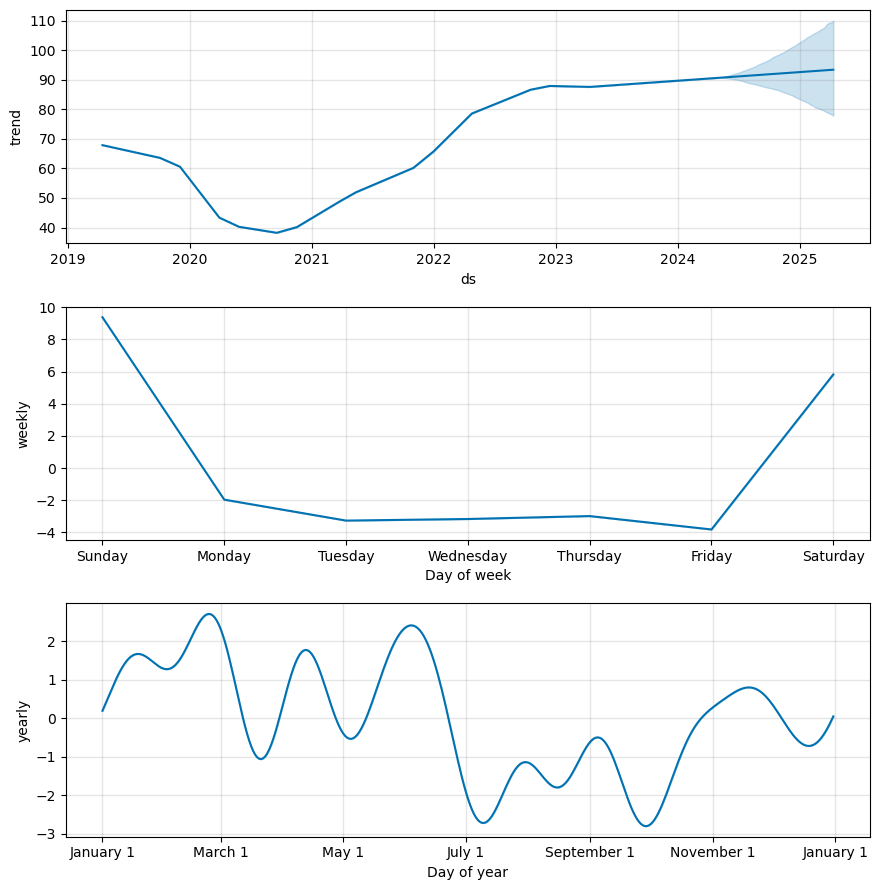

In [25]:
# Prophet Section

interim = prophet_df.drop(columns= ['high', 'low', 'trade_count', 'open', 'volume', 'vwap'])
interim = interim.reset_index()

prophet_model = interim[['timestamp', 'close']]
prophet_model['timestamp'] = prophet_model['timestamp'].apply(lambda d: d.replace(tzinfo=None))
prophet_model.rename(columns={"timestamp":"ds", "close":"y"}, inplace=True)

#display(prophet_model)


#Plotting Trends Dataframe'

display(prophet_model.hvplot(title= "Trends", xlabel="Date",ylabel="Closing Prices", xticks="symbol"))


Prophet_trends=Prophet()

Prophet_trends.fit(prophet_model)

Prophet_trends_forecast = Prophet_trends.make_future_dataframe(periods=365, freq='D')
#Prophet_trends_forecast
forecast = Prophet_trends.predict(Prophet_trends_forecast)
forecast

forecast[['yhat', 'yhat_lower', 'yhat_upper']].hvplot()
fig2 = Prophet_trends.plot_components(forecast)
